# Generalize Linear Model

这个章节的内容主要分成三部分

 1. Generalize Linear Model
 2. Linear Regression Model
 3. Logistic Regression Model

本章将按 2、3、1 的顺序来讲解，目的很简单，便于理解。

## Linear Regression Model

Linear Regression Model 就是为了找到数据的 Feature 和对应 Label 之间的线性关系，这里的线性关系可以是 Generalize 上的线性关系，Generalize 就是说模型的输入可以是直接是数据的 Feature，也可以是 Feature 经过函数变换后的结果。“ Regression ”的意思是说建立的模型输出不是一个类别变量，而是一个连续的、与原始的 Label 尽可能接近的实数。

最简单的 Linear Regression Model 是 Linear Regression with One Variable，也即 Feature 的数量是 1。可以通过 Numpy 很容易构造出这样的只有一个 Feature 和一个 Label 的数据集。

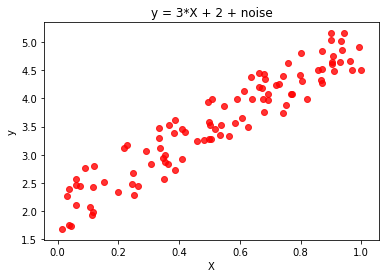

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * 3 + 2

noise = np.random.uniform(-0.5, 0.5, 100)
X = np.random.uniform(0, 1, 100)
y = f(X) + noise

plt.scatter(X, y, alpha=0.8, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('y = 3*X + 2 + noise')
plt.show()
plt.close()

执行上面的代码，可以生成这部分内容所需要的数据集。函数 $f(x)$ 定一个了线性关系，即 $Label = 3 \times Feature + 2 + noise$，noise 表示的是一个从 [-0.5, 0.5) 正态分布中产生的随机数。添加 noise 的想法很直接，因为在实际的生活中，采集数据是会有误差的。

在这样的数据集上应用的 Linear Regression Model 方法，设定用于拟合数据集的函数为 $\hat{y}=\theta \cdot x + b$，在这个函数中，如果求解出 $\theta$ 和 $b$，任务就完成了。如何求解呢，可以这样想，一开始随机设置一个 $\theta$ 和 $b$，然后对比 $y$ 和 $\hat{y}$ 的差别，然后修改 $\theta$ 和 $b$ 使得新的 $y$ 和 $\hat{y}$ 的差距越来越小。上面这句话描述了 Machine Learning 中很重要的两个概念 Loss 和 Learning Method。在当前的情况下，Loss 可以选择 Mean Squared Error，用数学公式表示即为 $Loss(y, \hat{y}) = \frac{1}{2} (y - \hat{y})^2=\frac{1}{2} (y - \theta \cdot x - b)^2$。

## Stochastic Graident Descent

Learning Method 的目的是使得 Loss 的值越来越小，即要找到 Loss 的一个极小（极大）值。由于上面的 Loss 函数是关于 $\theta$ 和 $b$ 的二次函数，其他的 $y$ 和 $x$ 都是已知值，也即训练数据。所以 Loss 函数可以表示为 $Loss(\theta, b)$，要使得 Loss 变小，可以让 $\theta_{new} = \theta_{old} - \frac{\partial Loss}{\partial \theta}$，同理 $b$ 的变化方式也一样，知道 Loss 为 0 或者小于一个指定的值，就可以认为找到了理想的 $\theta$ 和 $b$。

$\begin{align*}
\theta & = \theta - (y - \hat{y}) \cdot x\\
b & = b - (y - \hat{y})
\end{align*}$

In [17]:
theta = 0.001
b = 0.001
LEARNINGRATE = 1e-5

print(y)

len = X.shape[0]

EPOCH = 10
for epoch in range(EPOCH):
    index = np.random.randint(0, len - 1, size=1)
    x = X[index]
    y = y[index]

    y_pred = theta * x + b
    loss = y - y_pred
    theta = theta - LEARNINGRATE * loss * x
    b = b - LEARNINGRATE * loss
    print('loss is %d' % loss)

[3.86683542 4.63714051 2.67102779 4.06783593 3.57709239 5.15555423
 4.07639282 2.29479679 4.38643453 4.43318155 2.42297887 4.13186513
 3.4957091  3.32428755 2.44424434 4.47621128 4.90775521 2.98853973
 4.43916259 3.99111637 4.66537518 2.26867574 3.12738534 3.07094239
 2.57591037 4.18449533 2.10399909 4.51357205 3.26406824 1.75282178
 2.48615743 4.32337517 2.75660509 3.97671261 2.86757908 3.29178898
 1.9946088  4.50505127 2.33963992 4.85114688 3.27792352 4.2017575
 3.97855976 3.99082614 4.74306998 3.98040696 3.34215199 3.4015794
 5.02256262 4.60366464 3.88447005 5.14855193 3.17253988 3.52078222
 2.46485331 3.92838939 3.46100637 1.74399741 4.34254106 4.50035856
 3.98462587 2.51742347 3.52414658 4.37044111 3.24853185 1.93240927
 3.56135256 4.64012598 5.03286769 4.82976129 2.84037024 2.94656431
 4.4202146  3.27777865 3.76129945 3.62177758 3.4701104  3.45395108
 4.08355257 2.39576232 2.06936879 4.29887322 3.5339987  4.80977581
 4.2770491  3.11362252 2.83032503 2.73370143 4.62621569 2.563795

IndexError: index 29 is out of bounds for axis 0 with size 1